In [1]:
%run dataframe.ipynb

Host Shape: rows: 4816389 and columns: 29
Summary Shape: rows: 2611 and columns: 33
EvtWarn Shape: rows: 39992 and columns: 36
RvBsm Shape: rows: 491 and columns: 18
Spat Shape: rows: 19389 and columns: 11
Headlamp: {0, 2, 3, -1}
Wiper: {0, 1, 2, 3, -1}
Turn Signal: {0, 1, 2, -1}
Stability Control Status: {0, -1}
Transition State: {0, 1, 2, 3, -1}
Traction Control Status: {0, 1, -2, -7, -6, -4, -3, -1}
Brake Status: {0, 1, -1}
Speed: 1000.0
Yaw Rate: 1000.0
No. of -1s in Headlamp :  43317
No. of -1s in Wiper :  43317
No. of -1s in Turn Signal :  43317
No. of -1s in Stability Control Status :  43317
No. of <0s in Transition State :  43317
No. of -1s in Headlamp :  43317
No. of -1s in Headlamp :  43317
No. of Speed at 1,000 :  43317
No. of Yaw Rate at 1,000 :  43317
No. of -1s in Headlamp :  0
No. of -1s in Wiper :  0
No. of -1s in Turn Signal :  0
No. of -1s in Stability Control Status :  0
No. of <0s in Transition State :  0
No. of -1s in Headlamp :  0
No. of -1s in Headlamp :  0
No. o

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

# HOST Data

## Subset Creation

In [3]:
df_host_subset = df_host.sample(n=1000000)
df_host_subset.head()

,brakestatus,device,headlamp,speed,stabilitycontrolstatus,traccontrolstatus,transstate,turnsignal,wiper,yawrate
187971,0,102816,0,28.311111,0,0,2,0,0,-0.000015
3228615,0,100329,0,31.875000,0,0,2,0,1,-0.244156
1103315,1,100085,0,0.000000,0,0,2,0,0,0.000000
349401,0,100943,0,37.255554,0,0,2,0,1,-0.244156
45449,1,102752,0,0.000000,0,0,1,0,0,0.244125


## Correlation Matrix

<AxesSubplot:>

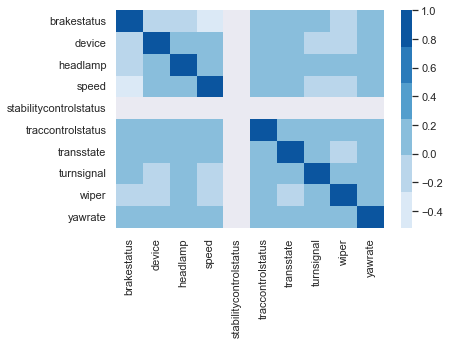

In [4]:
# creating a colormap
colormap = sns.color_palette("Blues")

sns.heatmap(df_host.corr(), cmap=colormap)

### Insights

- There appears to be no strong correlation between any of the features
- Some correlation near 0.20 include
    - Brake Status vs Traction Control, Transition State, Turn Signal, and YawRate
    - Headlamp vs (All) Traction Control, Transition State, Turn Signal, Wiper, and Speed, and YawRate
    - Speed vs Traction Control, Transition State, and Yaw Rate
    - Traction Control vs (All)
    - Transition State vs everything but wiper
    - Turn Signal vs Headlamp, Traction Control, Transition State, Wiper, and YawRate
    - Wiper vs Headlamp, Traction Control, Turn Signal, and YawRate

Overall, it seems that the wiper is the odd one out.

## Plotting

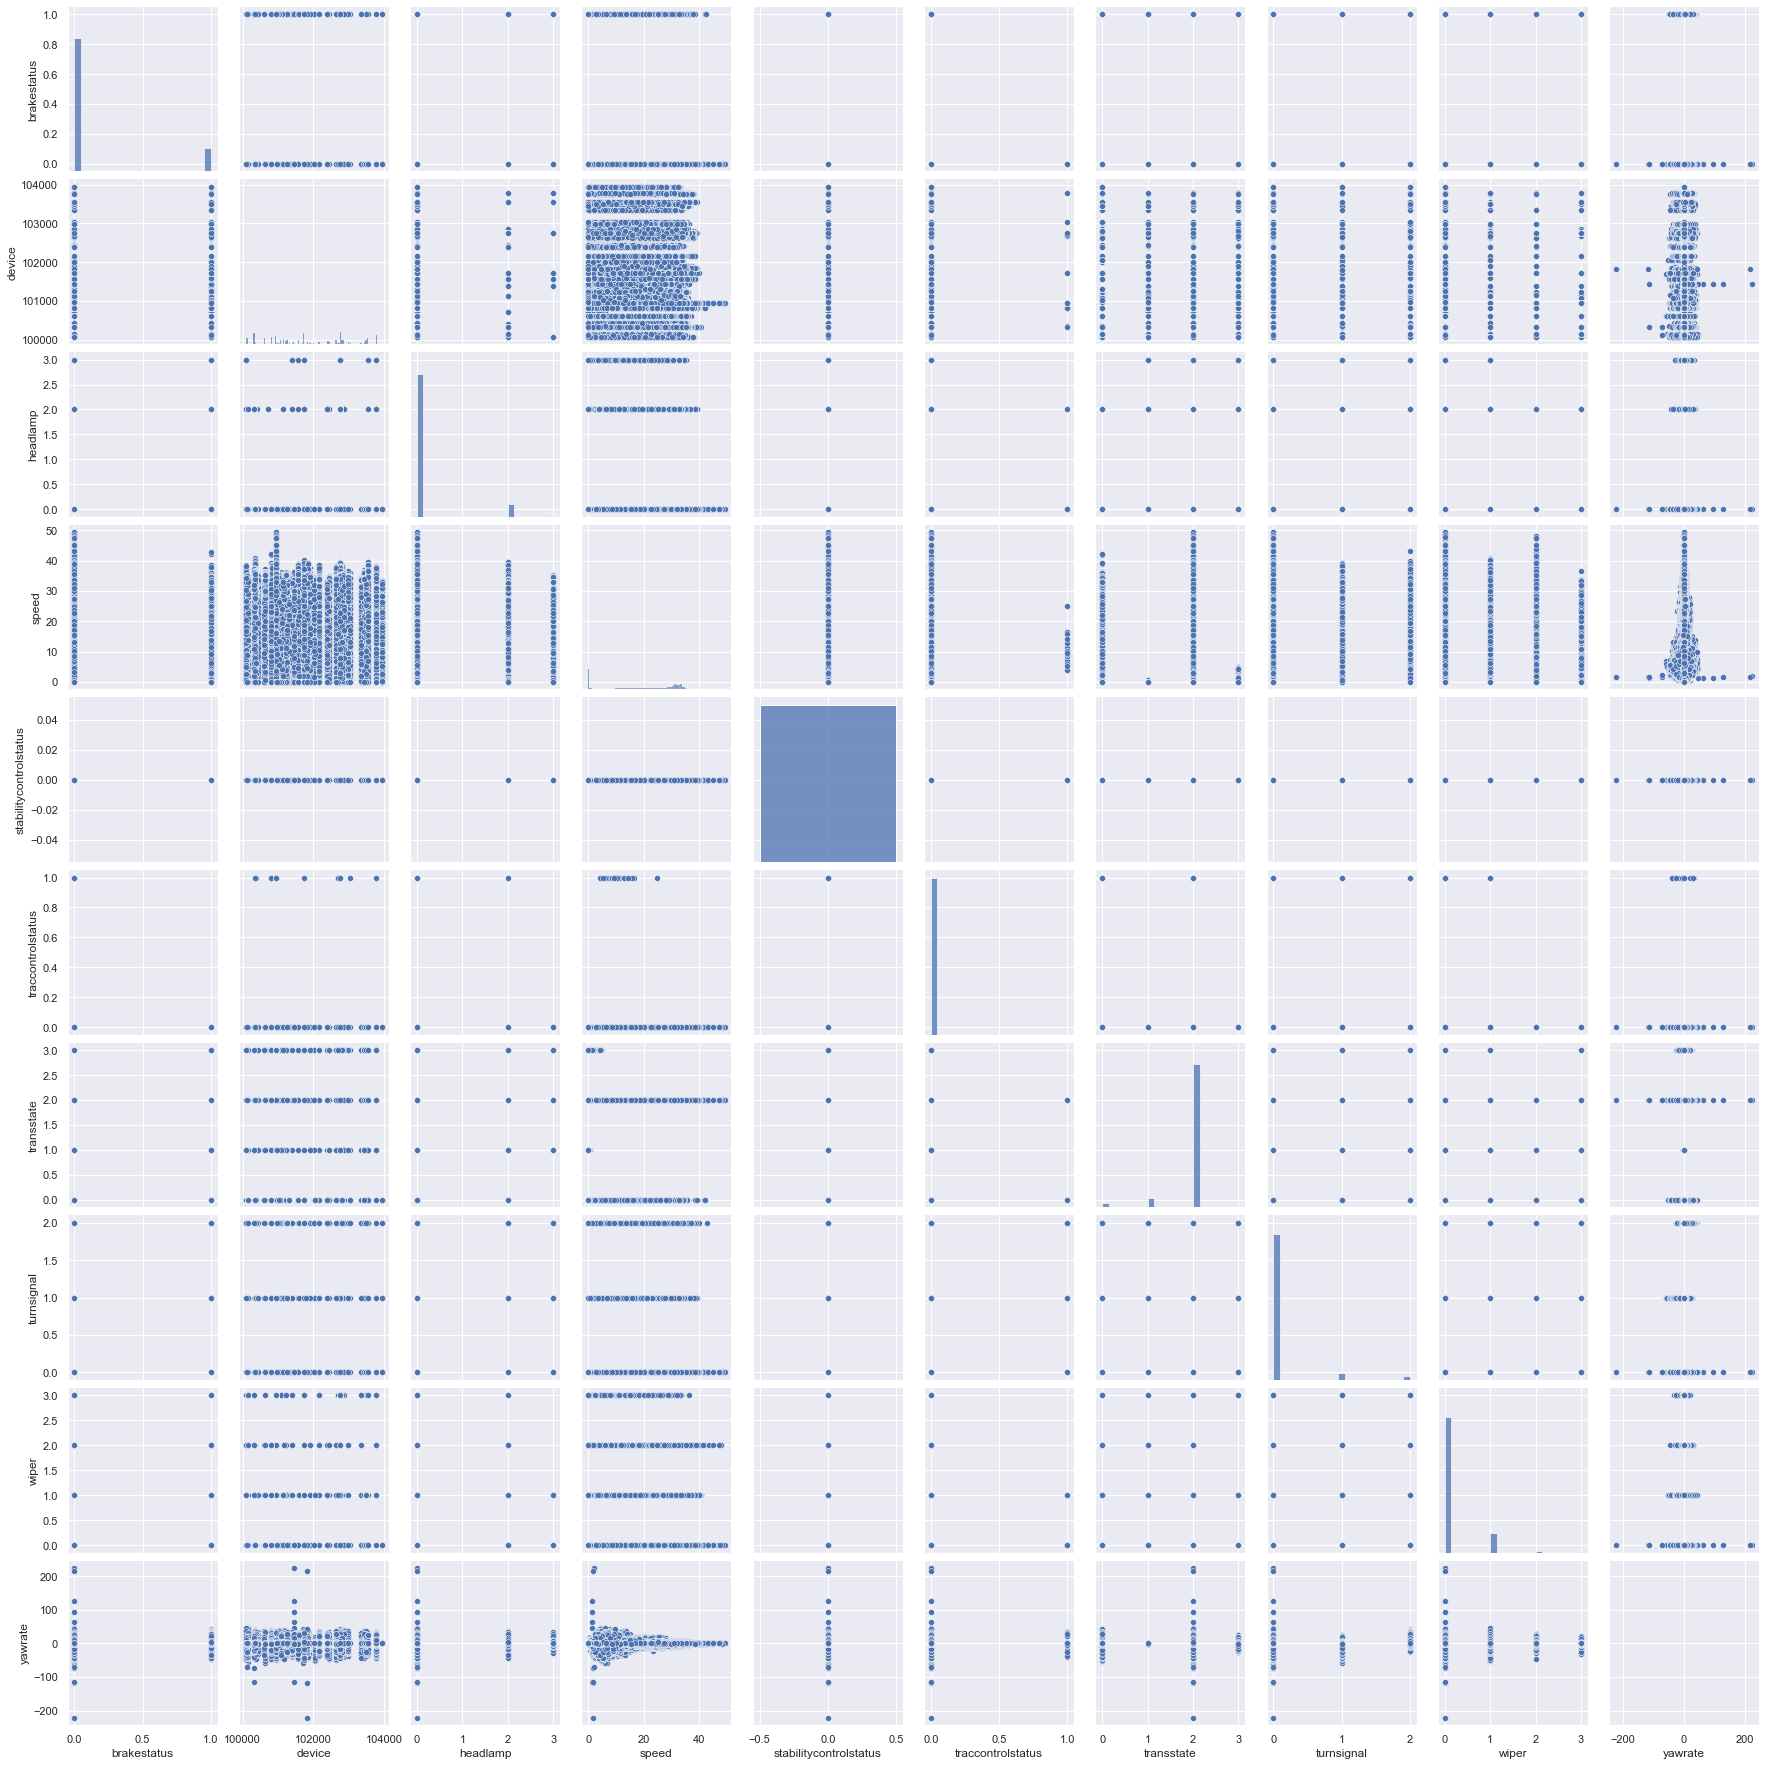

In [5]:
sns.pairplot(df_host_subset, dropna = True)

## Insights

- When headlamp is on, people tend to not go as fast (Headlamp vs Speed)
- When speed increases, the yaw rate gradually goes to zero (Speed vs Yaw Rate)
- When speed increases people generally don't use their turn signals (Speed vs Turn Signal)
- When people in transtate #2, yaw rate is more dispersed

In [6]:
column_names = list(df_host_subset.columns)


### Bar Plots

<AxesSubplot:xlabel='speed', ylabel='speed'>

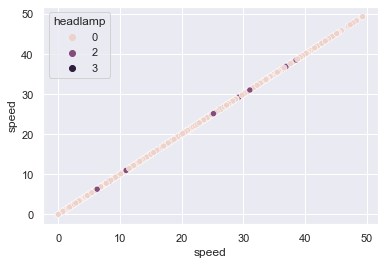

In [16]:
# Speed vs Headlamp
sns.scatterplot(x='speed', y='speed', hue='headlamp', data=df_host_subset)


<AxesSubplot:xlabel='speed', ylabel='yawrate'>

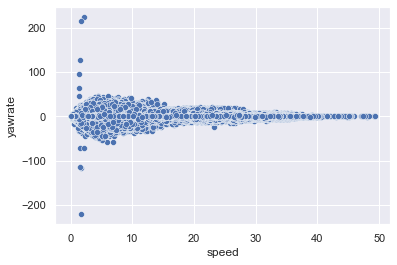

In [17]:
# Speed vs Yaw Rate
sns.scatterplot(x='speed', y='yawrate', data=df_host_subset)

<AxesSubplot:xlabel='speed', ylabel='speed'>

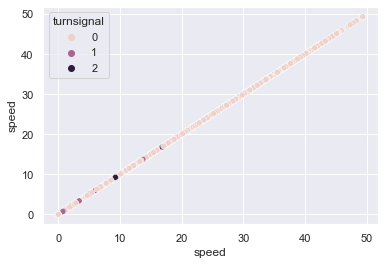

In [18]:
# Speed vs Turn Signal
sns.scatterplot(x='speed', y='speed', hue='turnsignal', data=df_host_subset)

<AxesSubplot:xlabel='yawrate', ylabel='yawrate'>

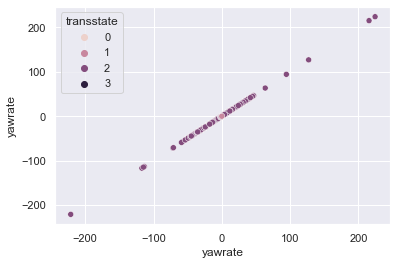

In [20]:
# Yaw Rate vs Transition STate
sns.scatterplot(x='yawrate', y='yawrate', hue='transstate', data=df_host_subset)